In [2]:
import rasterio as rio
import numpy as np
import pandas as pd
import glob as g
import plotly.express as px

In [3]:
labels_base_folder = "/storage/home/nak5437/work/github/LandCoverNet-Capstone/image_labels/ref_landcovernet_af_v1_labels_*/*.tif"
labels_file_list = g.glob(labels_base_folder)
print(labels_file_list[0])

/storage/home/nak5437/work/github/LandCoverNet-Capstone/image_labels/ref_landcovernet_af_v1_labels_28QDE_00/labels.tif


In [4]:
# image = rio.open(labels_file_list[50])
# lab_matrix = image.read()[0]
# np.unique(lab_matrix, return_counts = True)

In [5]:
tilechip = ["35JKL_19", "36RVP_05", "35PNR_15", "35NRD_06"]

matching_list = []
for i in tilechip:
    path = [s for s in labels_file_list if i in s]
    matching_list.append(path)

# unpack list
matching_list = sum(matching_list, [])

In [18]:
master_labels = []
for tilechip in matching_list:
    image = rio.open(tilechip)
    #lab_matrix = image.read()[0]
    master_labels.append(image.read()[0])
    
res = np.array(master_labels).flatten()
# res = np.array([res_class, res_count]).flatten
res = np.unique(res, return_counts = True)

Text(0, 0.5, 'Count')

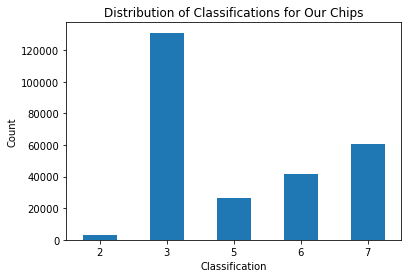

In [19]:
res = pd.Series(dict(zip(res[0], res[1])))
vis1 = res.plot.bar(rot = 0)
vis1.set_title("Distribution of Classifications for Our Chips")
vis1.set_xlabel("Classification")
vis1.set_ylabel("Count")

In [11]:
total_labels = []
for tilechip in labels_file_list:
    image = rio.open(tilechip)
    #lab_matrix = image.read()[0]
    total_labels.append(image.read()[0])
    
full_res = np.array(total_labels).flatten()
# res = np.array([res_class, res_count]).flatten
full_res = np.unique(full_res, return_counts = True)

<AxesSubplot:title={'center':'Distribution of Classifications Across Africa'}, xlabel='Classification', ylabel='Count'>

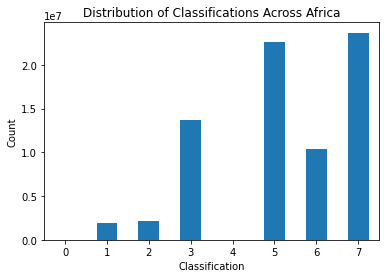

In [12]:
full_res = pd.Series(dict(zip(full_res[0], full_res[1])))
vis2 = full_res.plot.bar(rot = 0)
vis2.set_title("Distribution of Classifications Across Africa")
vis2.set_xlabel("Classification")
vis2.set_ylabel("Count")
vis2

In [17]:
full_res

0       33921
1     1917970
2     2110486
3    13647486
4        9440
5    22591010
6    10387537
7    23685510
dtype: int64